# Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "final_project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

## Load Data

In [3]:
trainRDD = sc.textFile('data/train.txt')
#testRDD = sc.textFile('data/test.txt')

In [4]:
def mapper(line, n):
    """
    Splits line on tabs; converts blanks to nulls; converts first n columns to integers
    """
    return [None if x == '' else int(x) if idx < n else x for idx,x in enumerate(line.split('\t'))]

In [4]:
print('Train example row:')
print(trainRDD.map(lambda x: mapper(x, 14)).take(1))
print('\nTrain row count:', trainRDD.count()) # Count took 2.2 minutes to run

Train example rows:
[[0, 1, 1, 5, 0, 1382, 4, 15, 2, 181, 1, 2, None, 2, '68fd1e64', '80e26c9b', 'fb936136', '7b4723c4', '25c83c98', '7e0ccccf', 'de7995b8', '1f89b562', 'a73ee510', 'a8cd5504', 'b2cb9c98', '37c9c164', '2824a5f6', '1adce6ef', '8ba8b39a', '891b62e7', 'e5ba7672', 'f54016b9', '21ddcdc9', 'b1252a9d', '07b5194c', None, '3a171ecb', 'c5c50484', 'e8b83407', '9727dd16']]

Train row count: 45840617


In [5]:
print('Test example row:')
print(testRDD.map(lambda x: mapper(x, 13)).take(1))
print('\nTest row count:', testRDD.count()) # Count took 13 seconds to run

Test example row:
[[None, 29, 50, 5, 7260, 437, 1, 4, 14, None, 1, 0, 6, '5a9ed9b0', 'a0e12995', 'a1e14474', '08a40877', '25c83c98', None, '964d1fdd', '5b392875', 'a73ee510', 'de89c3d2', '59cd5ae7', '8d98db20', '8b216f7b', '1adce6ef', '78c64a1d', '3ecdadf7', '3486227d', '1616f155', '21ddcdc9', '5840adea', '2c277e62', None, '423fab69', '54c91918', '9b3e8820', 'e75c9ae9']]

Test row count: 6042135


In [5]:
trainSample = trainRDD \
    .map(lambda x: mapper(x, 14)) \
    .take(1000)
    #.takeSample(withReplacement=False, num=1000, seed=10) # Took 5.1 minutes to run

# What should N and seed be?

print(trainSample[0])

[0, 1, 1, 5, 0, 1382, 4, 15, 2, 181, 1, 2, None, 2, '68fd1e64', '80e26c9b', 'fb936136', '7b4723c4', '25c83c98', '7e0ccccf', 'de7995b8', '1f89b562', 'a73ee510', 'a8cd5504', 'b2cb9c98', '37c9c164', '2824a5f6', '1adce6ef', '8ba8b39a', '891b62e7', 'e5ba7672', 'f54016b9', '21ddcdc9', 'b1252a9d', '07b5194c', None, '3a171ecb', 'c5c50484', 'e8b83407', '9727dd16']


## EDA

In [ ]:
# Percent nulls
labels = []
null_pct = []
for i in range(len(trainSample[0])):
    data = [x[i] for x in trainSample if x[i] != None]
    labels.append('label' if i == 0 else 'intCol'+str(i) if i < 14 else 'strCol'+str(i))
    null_pct.append(1 - (len(data) / float(len(trainSample))))

In [ ]:
print(labels)
print(null_pct)

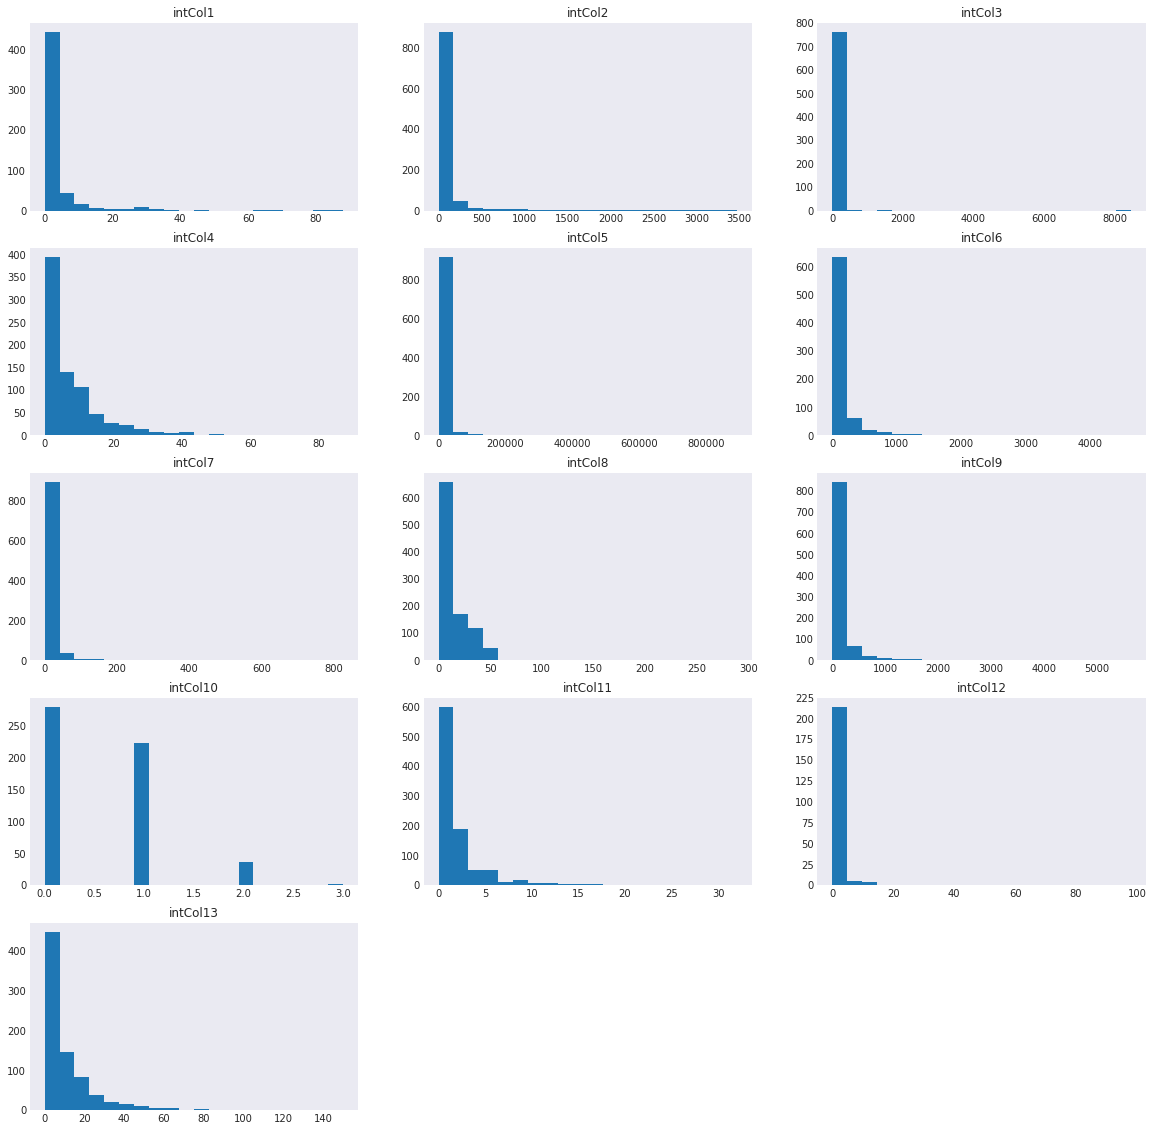

In [11]:
plt.figure(figsize=(20, 20))
for i in range(1, 14):#range(len(trainSample[0])):
    data = [x[i] for x in trainSample if x[i] != None]
    label = 'intCol'+str(i)
    plt.subplot(5, 3, i)
    plt.hist(data, bins=20)
    plt.title(label)

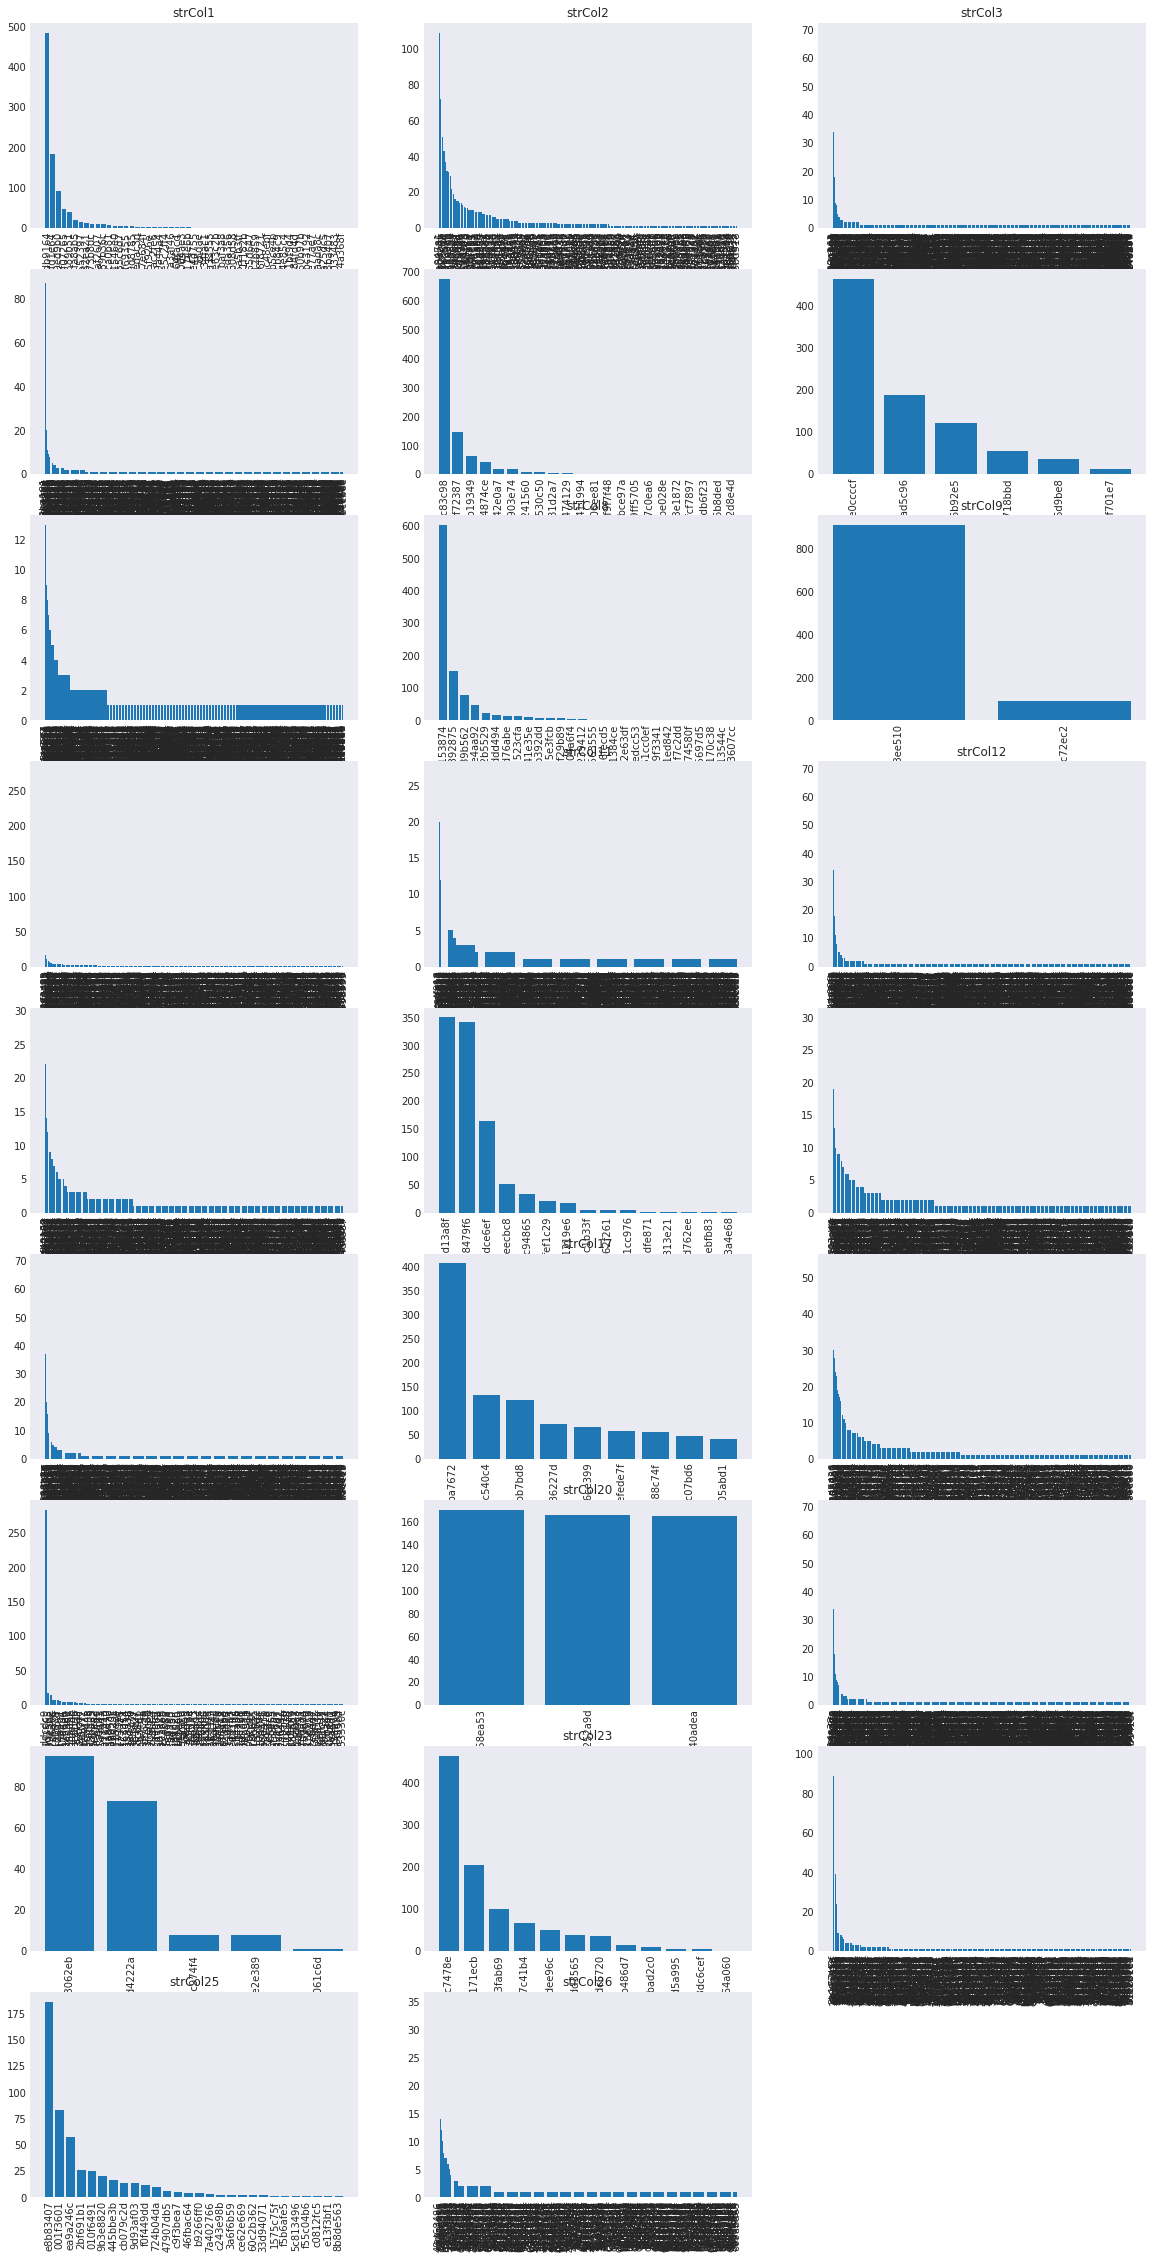

In [15]:
plt.figure(figsize=(20, 40))
for i in range(14, 40):
    data = [x[i] for x in trainSample if x[i] != None]
    label = 'strCol'+str(i-13)
    df = pd.concat([pd.DataFrame(np.array(data), columns=[label]),
                    pd.DataFrame([1]*len(data), columns=['extra'])],
                   axis=1).fillna('NaN')
    gb = df.groupby(by=[label])[label].count().sort_values(ascending=False)
    plt.subplot(9, 3, i-13)
    plt.bar(gb.index, gb.values)
    plt.xticks(range(len(gb.index)), gb.index, rotation='vertical')
    plt.title(label)

In [18]:
print('Label mean:', np.mean([x[0] for x in trainSample]))
print('Label variance:', np.var([x[0] for x in trainSample]))

Label mean: 0.205
Label variance: 0.16297500000000004
